In [5]:
import sys
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import copy
sys.path.insert(0, '/home/ryan/projects/CHARM-KASTr/py/')
from median import median
from create_mask import create_mask
from normalize_flat import normalize_flat
from bias_subtract import bias_subtract
from variance_image import variance_image

In [6]:
run floader.py

In [7]:
b = median(BIAS)

In [8]:
f = median(FLAT)

In [9]:
m = create_mask(f,b)

In [10]:
nf = normalize_flat(f,m)

In [11]:
subtr = bias_subtract(f, b)

In [12]:
ghdul = fits.open('/home/ryan/projects/CHARMKASTR/raw/data-2017-08-12-shane-Adam.Burgasser/red/test1035/science/r1033.fits')

In [13]:
g_star = ghdul[0].data

In [14]:
g_subtr = bias_subtract(g_star, b)

In [15]:
g_var = variance_image(g_subtr)

In [16]:
g_norm = g_subtr / nf

In [17]:
g_median = np.median(g_norm)

In [18]:
g_masked = copy.deepcopy(g_norm)

for i in range (g_masked.shape[0]):
    for j in range(g_masked.shape[1]):
        if m[i][j] == 1:
            g_masked[i][j] = g_median
            

In [19]:
xpk = np.argmax(g_masked, axis=1)

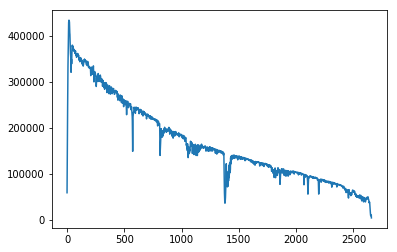

In [20]:
xpeak = []
impc = []
for i in range(len(g_masked[:,0])):
    slc = g_masked[i,:]
    xpeak.append(np.argmax(slc))
    if xpeak[-1] > 150 and xpeak[-1] < 165:
        impc.append(slc[xpeak[-1]-10:xpeak[-1]+10])
plt.plot(np.sum(impc,axis=1))

In [21]:
yrange = np.arange(0, xpk.size, 1)

In [22]:
asdf = np.arange(0, xpk.size, 1)

In [23]:
xprk = copy.deepcopy(xpk)

xpkmedian = np.median(xpk)

for i in range(xpk.size):
    if xpk[i] <= 155 or xpk[i] >= 165:
        xprk[i] = xpkmedian


p = np.poly1d(np.polyfit(yrange, xprk, 4))

In [24]:
xprk

array([158, 158, 158, ..., 158, 158, 158])

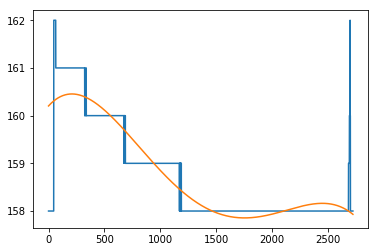

In [25]:
plt.plot(xprk)
plt.plot(asdf, p(asdf))

In [27]:
islc = []
for i in range(len(g_masked[:, 0])):
    slc = g_masked[i,:]
    islc.append(slc[int(p(i)-10):int(p(i)+10)])

In [28]:
fslc = []
asd = copy.deepcopy(islc)
for i in range(len(islc)):
    slc = asd[i]
    smax = np.amax(slc)
    smedian = np.median(slc)
        
    slc = slc - smedian
    slc = slc / smax
    
    fslc.append(slc)
    